In [ ]:
"""
    Python notebook for sentiment's frequencies visualization
"""

In [1]:
from os import path
from wordcloud import WordCloud
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country = "GB"
season = "2019"
weekgame = "38"
file_title = country + '/' + season + '/' + weekgame + "_analysis.csv"
df = pd.read_csv(file_title)
print(df.shape)
df.head(5)

(1915, 21)


,Unnamed: 0,season,weekgame,home_team,away_team,favorite_count,lang,retweet_count,retweeted,text,...,verified,user,pre_label,no_mentions,support,with_emojis,sentiment,score,m_support,m_sentiment
0,0,2019,38,LEI,MUN,0,en,0,False,@DeporFinanzas @bardofstreets @LFC @FCBarcelon...,...,False,hassanthegr8,1,even an underperforming barca is at number 2,-1,@DeporFinanzas @bardofstreets @LFC @FCBarcelon...,-1,0,-1,-1
1,1,2019,38,LEI,MUN,0,en,0,False,@tpitch51 @premierleague @HolaItsAbdullah @LCF...,...,False,hassanthegr8,1,its all about today now,0,@tpitch51 @premierleague @HolaItsAbdullah @LCF...,1,0,0,1
2,2,2019,38,LEI,MUN,0,en,0,False,Excitement has now turned to nerves! Come on @...,...,False,DeanJohnsonMUFC,1,Excitement has now turned to nerves Come on on...,-1,Excitement has now turned to nerves! Come on @...,1,0,-1,1
3,3,2019,38,LEI,MUN,1,en,0,False,@ManUtd Don't be shit :-),...,False,SammonDStallion,1,Don t be shit,-1,@ManUtd Don't be shit good,-1,0,-1,-1
4,4,2019,38,LEI,MUN,1,en,0,False,Gonna watch the match between @ManUtd and @LC...,...,False,Riyel_19,1,Gonna watch the match between and Which team i...,0,Gonna watch the match between @ManUtd and @LCF...,0,0,0,0


In [3]:
# Pre_label positives and negatives
pl_pos = df[(df["pre_label"]==1)]
pl_neg = df[(df["pre_label"]==-1)]

In [13]:
# Sentiment positives and negatives
sen_pos = df[(df["sentiment"]==1)]
sen_neg = df[(df["sentiment"]==-1)]

In [18]:
def get_word_cloud(df):
    text = df['no_mentions'].values 
    # lower max_font_size
    wordcloud = WordCloud(background_color="white", max_words=2000, max_font_size=40).generate(str(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

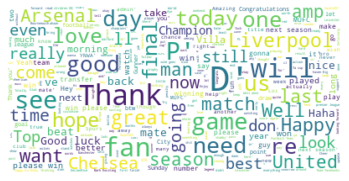

In [19]:
get_word_cloud(pl_pos)

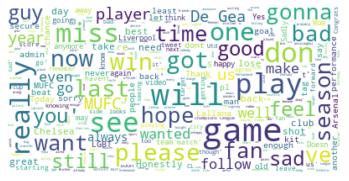

In [20]:
get_word_cloud(pl_neg)

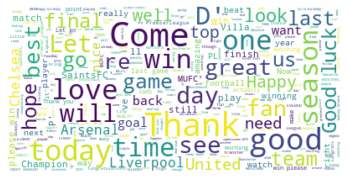

In [21]:
get_word_cloud(sen_pos)

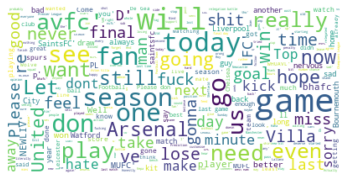

In [22]:
get_word_cloud(sen_neg)

In [132]:
pre_label = df.groupby(['home_team','away_team','support','pre_label']).count()
sentiment = df.groupby(['home_team','away_team','support','sentiment']).count()
modified = df.groupby(['home_team','away_team','m_support','m_sentiment']).count()

In [34]:
def return_index(index):
    if index == -1:
        return 2
    if index == 1:
        return 0
    if index == 0:
        return 1

In [129]:
# For sentiment [positive, neutral, negative]
# For support [home_team, both, away_team]
def group_distribution(grouped):
    dct_groups = dict()
    for ite, row in grouped.iterrows():
        match = ite[0] + '-' + ite[1]
        if match not in dct_groups:
            dct_groups[match] = [[0,0,0],[0,0,0],[0,0,0]]
            i_support = return_index(ite[2])
            i_sentiment = return_index(ite[3])
            dct_groups[match][i_support][i_sentiment]=row["season"]
        else:
            i_support = return_index(ite[2])
            i_sentiment = return_index(ite[3])
            dct_groups[match][i_support][i_sentiment]+=row["season"]
    
    # Get lists
    match_labels = list(dct_groups.keys())
    pos_home = np.array([])
    pos_draw = np.array([])
    pos_away = np.array([])
    neg_home = np.array([])
    neg_draw = np.array([])
    neg_away = np.array([])
    neu_home = np.array([])
    neu_draw = np.array([])
    neu_away = np.array([])
    for k,v in dct_groups.items():
        pos_home = np.append(pos_home, v[0][0])
        pos_draw = np.append(pos_draw, v[1][0])
        pos_away = np.append(pos_away, v[2][0])
        neu_home = np.append(neu_home, v[0][1])
        neu_draw = np.append(neu_draw, v[1][1])
        neu_away = np.append(neu_away, v[2][1])
        neg_home = np.append(neg_home, v[0][2])
        neg_draw = np.append(neg_draw, v[1][2])
        neg_away = np.append(neg_away, v[2][2])
    
    # set width of bar
    barWidth = 0.25
    
    plt.figure(figsize=(20,20))
    
    # Set position of bar on X axis
    r1 = [i for i in range(1, len(match_labels)+1)]
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    p1 = plt.bar(r1, pos_home, barWidth, color='navy', linewidth=1, edgecolor='white')
    p2 = plt.bar(r1, neu_home, barWidth,  bottom=pos_home, color='steelblue', linewidth=1, edgecolor='white')
    p3 = plt.bar(r1, neg_home, barWidth,  bottom=neu_home+pos_home, color='lightseagreen', linewidth=1, edgecolor='white')
    
    plt.bar(r2, pos_draw, barWidth, color='navy', linewidth=1, edgecolor='white')
    plt.bar(r2, neu_draw, barWidth,  bottom=pos_draw, color='steelblue', linewidth=1, edgecolor='white')
    plt.bar(r2, neg_draw, barWidth,  bottom=neu_draw+pos_draw, color='lightseagreen', linewidth=1, edgecolor='white')
    
    plt.bar(r3, pos_away, barWidth, color='navy', linewidth=1, edgecolor='white')
    plt.bar(r3, neu_away, barWidth,  bottom=pos_away, color='steelblue', linewidth=1, edgecolor='white')
    plt.bar(r3, neg_away, barWidth,  bottom=neu_away+pos_away, color='lightseagreen', linewidth=1, edgecolor='white')
    
    plt.ylabel('Sentiment')
    plt.title('Frequency by Support and Sentiment')
    plt.xticks([r + barWidth for r in range(1, len(match_labels)+1)], list(match_labels))
    plt.legend((p1[0], p2[0], p3[0]), ('Positive', 'Neutral','Negative'))
    plt.show()

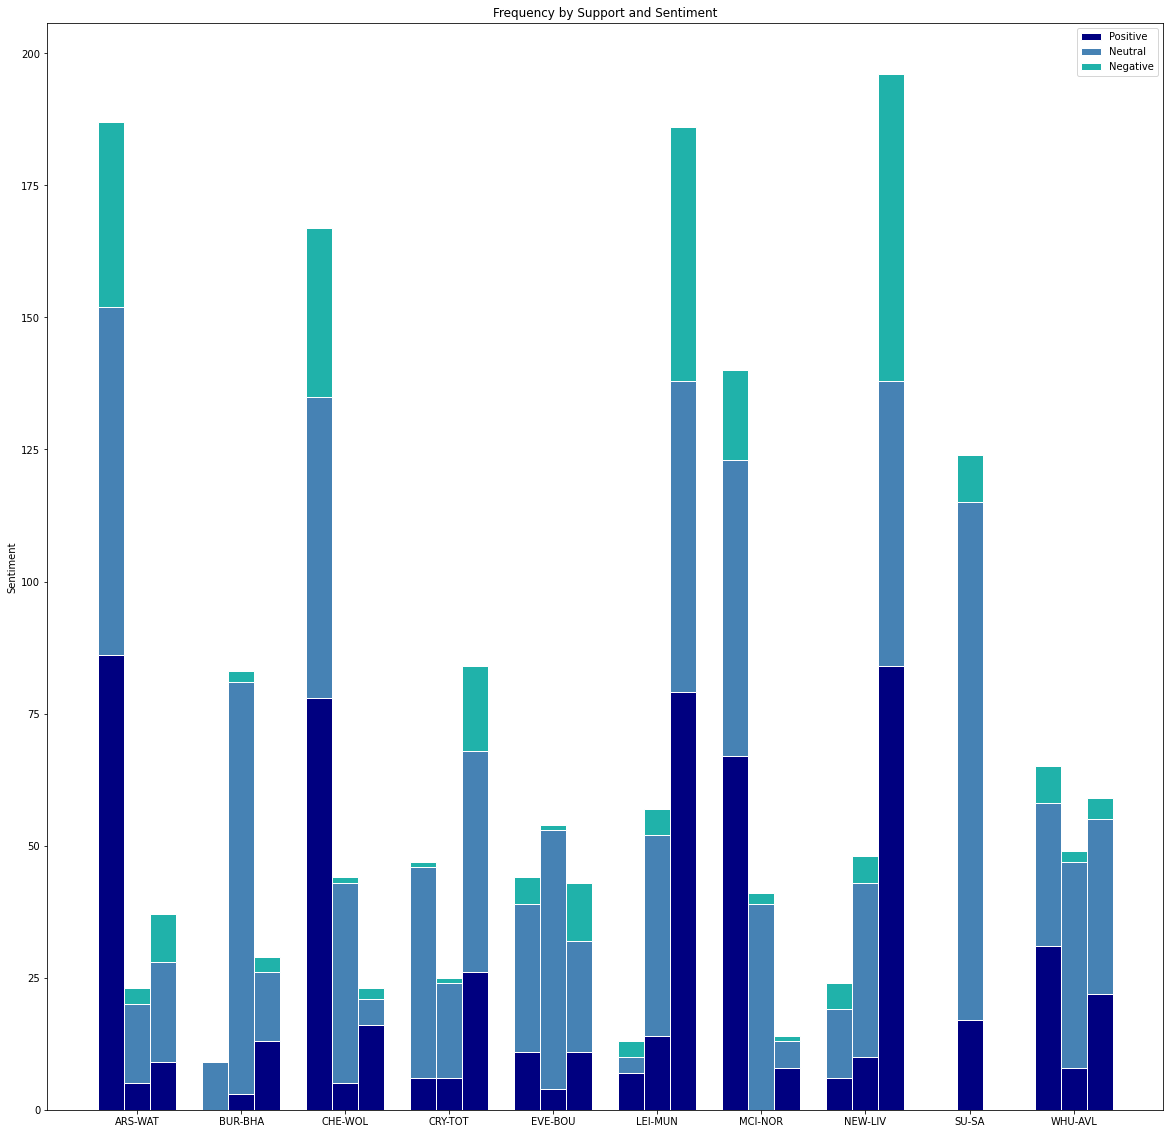

In [130]:
group_distribution(pre_label)

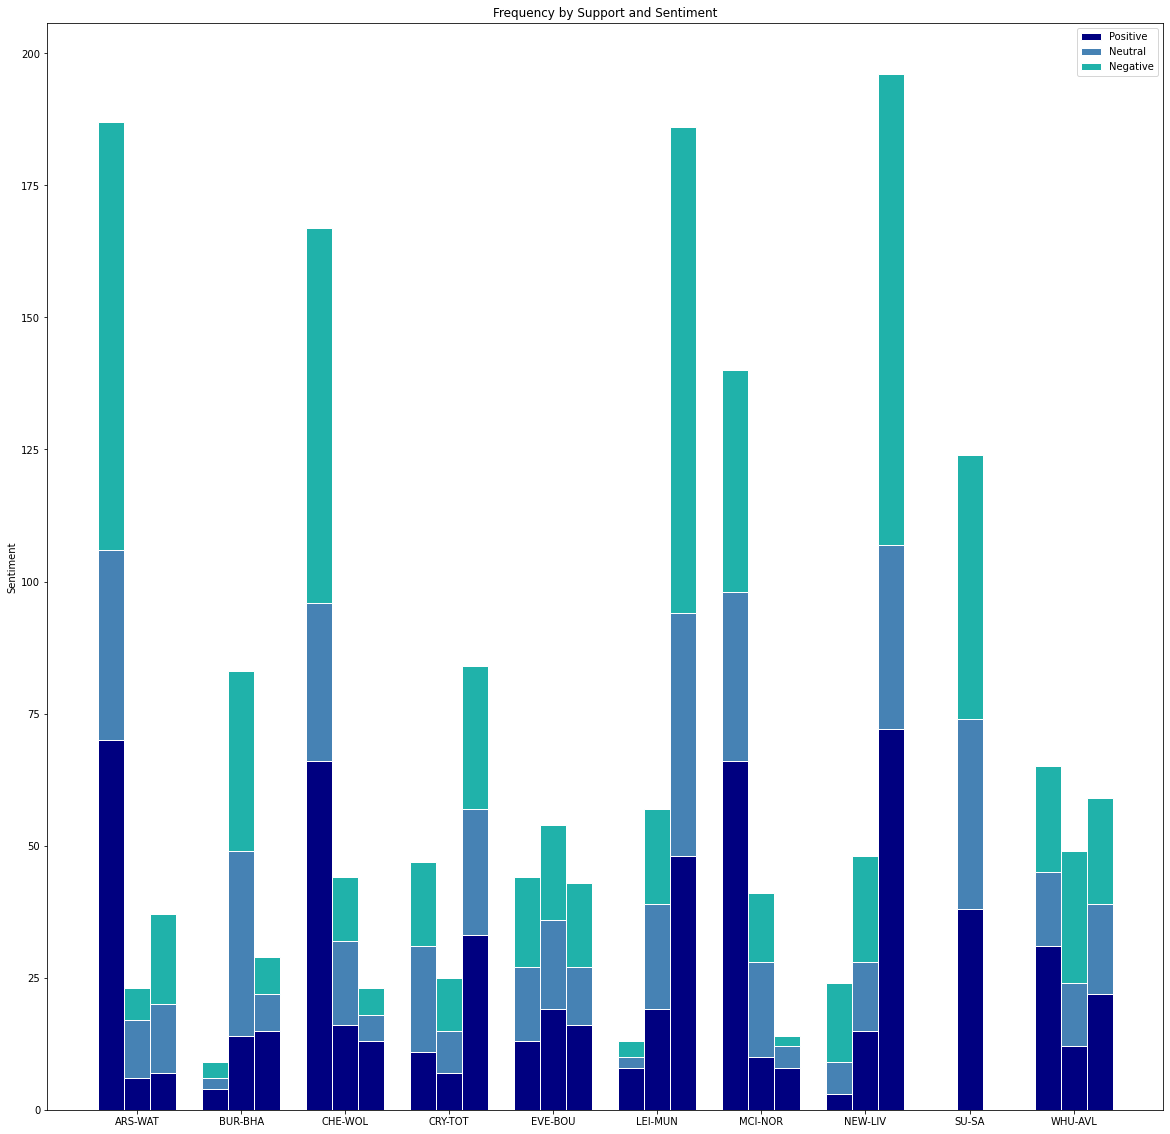

In [133]:
group_distribution(sentiment)

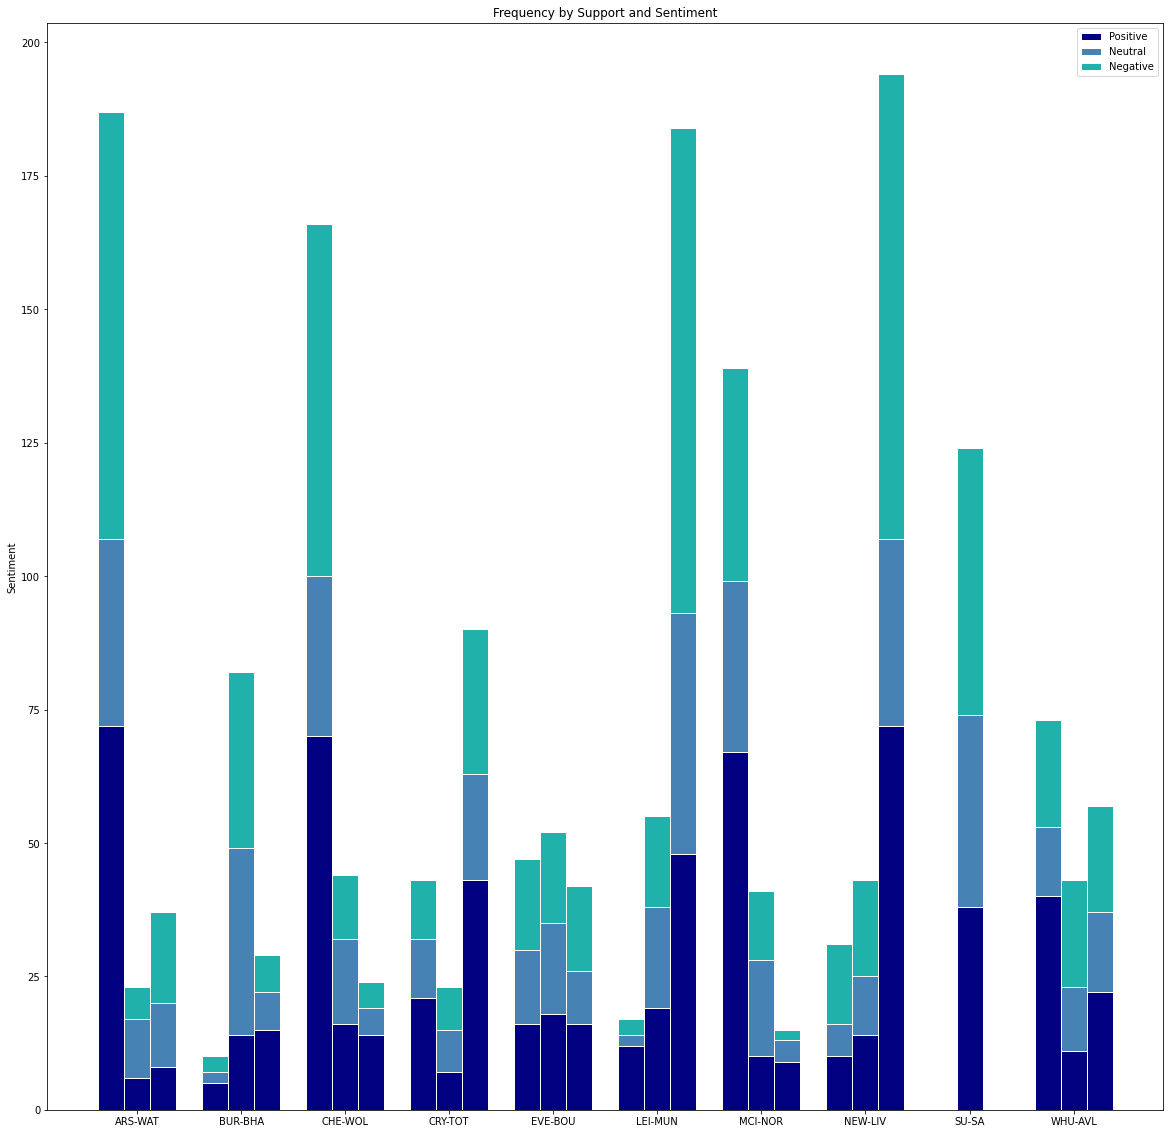

In [134]:
group_distribution(modified)